## **Ecommerce Analysis Data**

**Requirements**
1. Youneed to calculate the monthly sales of the store and identify which month had the highest sales and which month had the lowest sales.
2. You need to analyze sales based on product categories and determine which category has the lowest sales and which category has the highest sales.
3. The sales analysis needs to be done based on sub-categories.
4. You need to analyze the montly profit from sales and determine which month had the highest profit.
5. Analyze the profit by category and sub-category
6. Analyze the sales and profit by customer segment
7. Analyze the sales to profit ratio

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default='plotly_white'

In [2]:
data=pd.read_csv("Sample - Superstore.csv", encoding='latin-1')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


**Data Preproccessing**

In [3]:
data.describe( )

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
datetime_cols=['Order Date','Ship Date']
for cols in datetime_cols:
  data[cols]=pd.to_datetime(data[cols])

In [7]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9989    False
9990    False
9991    False
9992    False
9993    False
Length: 9994, dtype: bool

In [8]:
data.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [9]:
data['Order Years']=data['Order Date'].dt.year
data['Order Months']=data['Order Date'].dt.month
data['Order Days']=data['Order Date'].dt.dayofweek

In [10]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Years,Order Months,Order Days
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,1
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,1
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,6
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,6
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,6


Monthly Sales Analysis

In [12]:
sales_by_month=data.groupby('Order Months')['Sales'].sum().reset_index()
sales_by_month

,Order Months,Sales
0,1,94924.8356
1,2,59751.2514
2,3,205005.4888
3,4,137762.1286
4,5,155028.8117
5,6,152718.6793
6,7,147238.0970
7,8,159044.0630
8,9,307649.9457
9,10,200322.9847


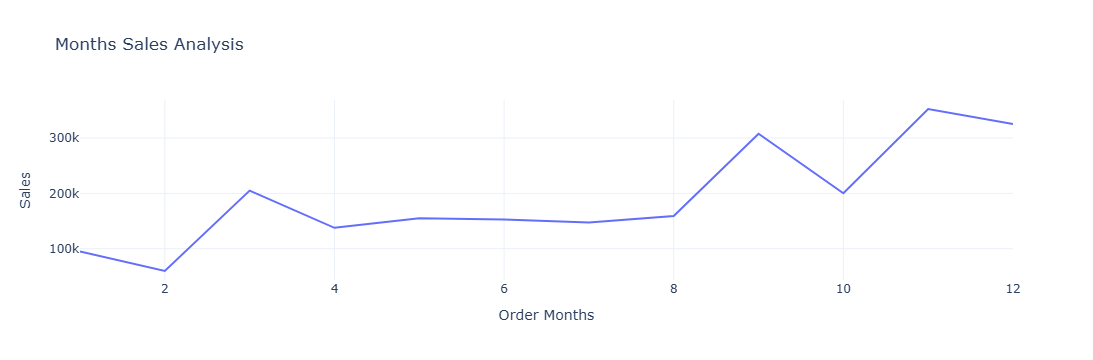

In [13]:
fig=px.line(sales_by_month,
            x="Order Months",
            y='Sales',
            title="Months Sales Analysis")
fig.show()

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

Category Analysis Product Sales Highest or Lowest

In [15]:
data.Category.unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [16]:
category_sales=data.groupby('Category')['Sales'].sum().reset_index()
category_sales

,Category,Sales
0,Furniture,741999.7953
1,Office Supplies,719047.0320
2,Technology,836154.0330


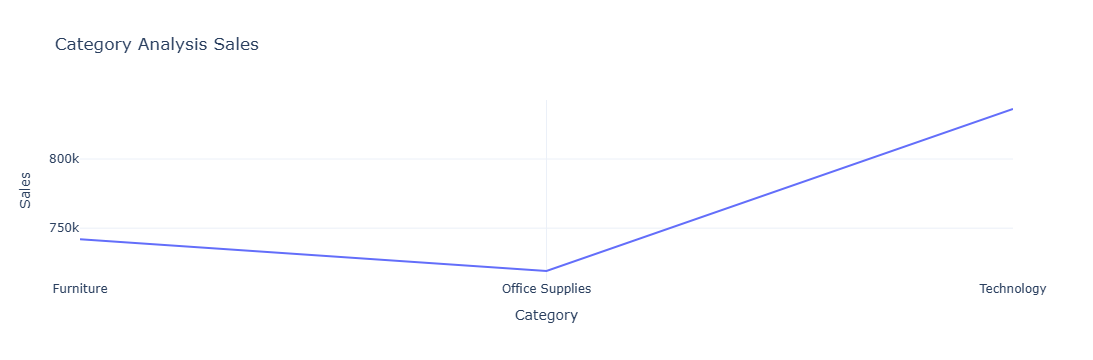

In [17]:
cat_fig=px.line(category_sales,
        x='Category',
        y='Sales',
        title="Category Analysis Sales"
        )
cat_fig.show()

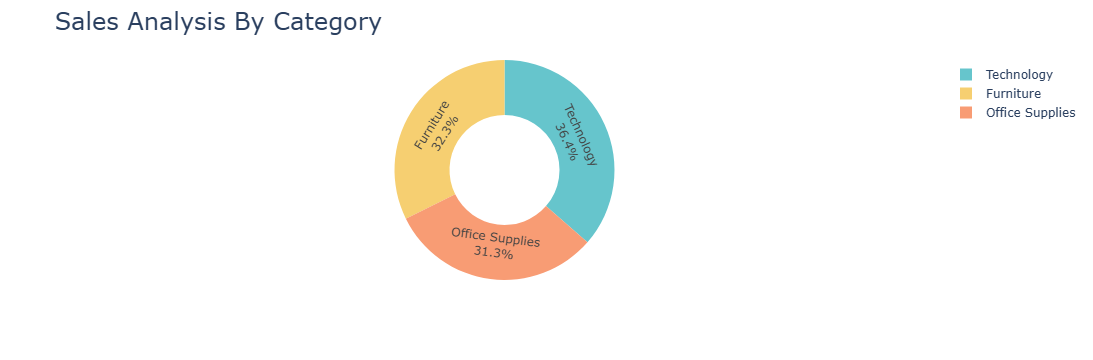

In [18]:
fig_pie=px.pie(
    category_sales,
    values='Sales',
    names='Category',
    hole=0.5,
    color_discrete_sequence=px.colors.qualitative.Pastel)
fig_pie.update_traces(textposition='inside',textinfo='percent+label')
fig_pie.update_layout(title_text='Sales Analysis By Category',title_font=dict(size=24))
fig_pie.show()

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [20]:
data['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [21]:
sales_by_sub_category=data.groupby('Sub-Category')['Sales'].sum().reset_index()
sales_by_sub_category

,Sub-Category,Sales
0,Accessories,167380.3180
1,Appliances,107532.1610
2,Art,27118.7920
3,Binders,203412.7330
4,Bookcases,114879.9963
5,Chairs,328449.1030
6,Copiers,149528.0300
7,Envelopes,16476.4020
8,Fasteners,3024.2800
9,Furnishings,91705.1640


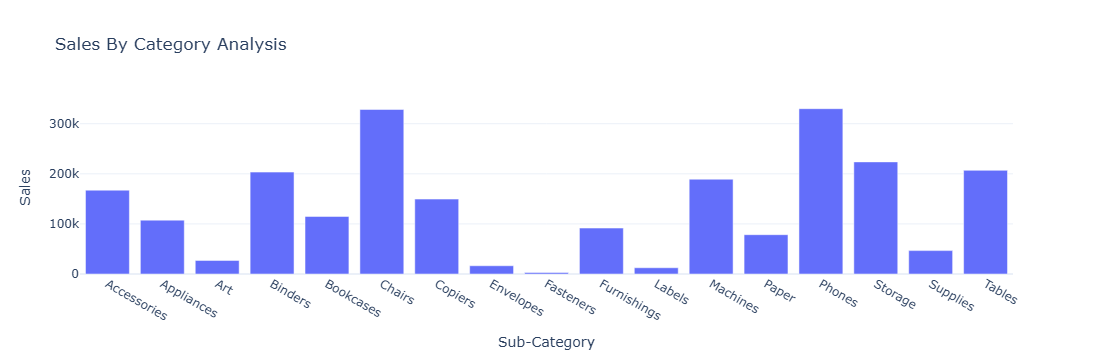

In [22]:
sub_cat_fig=px.bar(
    sales_by_sub_category,
    x='Sub-Category',
    y='Sales',
    title="Sales By Category Analysis"
)
sub_cat_fig.show()

# Monthly Sales Profit Analysis
You need to analyze the montly profit from sales and determine which month had the highest profit.

In [23]:
profit_by_monthly=data.groupby('Order Months')['Profit'].sum().reset_index()
profit_by_monthly

,Order Months,Profit
0,1,9134.4461
1,2,10294.6107
2,3,28594.6872
3,4,11587.4363
4,5,22411.3078
5,6,21285.7954
6,7,13832.6648
7,8,21776.9384
8,9,36857.4753
9,10,31784.0413


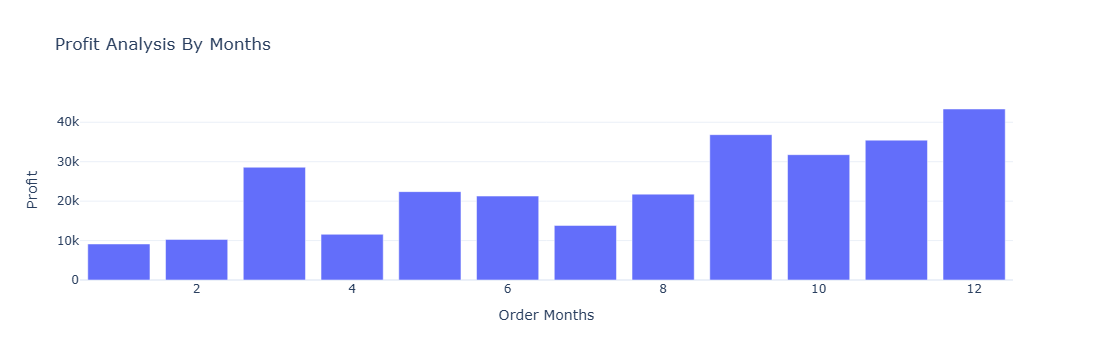

In [24]:
profit_fig=px.bar(
    profit_by_monthly,
    x='Order Months',
    y='Profit',
    title="Profit Analysis By Months"
)
profit_fig.show()

# Analyze the profit by category and sub-category

In [25]:
profit_by_cate=data.groupby(['Category','Sub-Category'])['Profit'].sum().reset_index()
profit_by_cate

,Category,Sub-Category,Profit
0,Furniture,Bookcases,-3472.5560
1,Furniture,Chairs,26590.1663
2,Furniture,Furnishings,13059.1436
3,Furniture,Tables,-17725.4811
4,Office Supplies,Appliances,18138.0054
5,Office Supplies,Art,6527.7870
6,Office Supplies,Binders,30221.7633
7,Office Supplies,Envelopes,6964.1767
8,Office Supplies,Fasteners,949.5182
9,Office Supplies,Labels,5546.2540


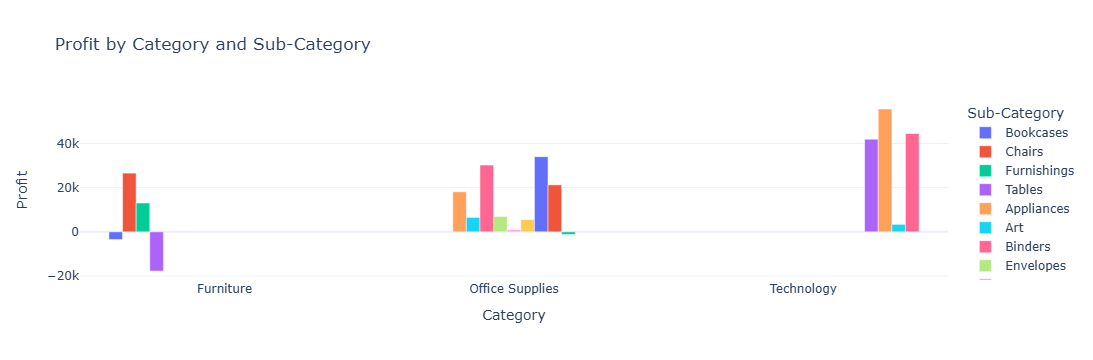

In [26]:
fig = px.bar(
    profit_by_cate,
    x='Category',
    y='Profit',
    color='Sub-Category',
    barmode='group',
    title='Profit by Category and Sub-Category'
)

fig.show()

Analyze the sales and profit by customer segment

In [27]:
data['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [28]:
customer_segment=data.groupby('Segment').agg({'Sales':'sum','Profit':'sum'}).reset_index()
customer_segment

,Segment,Sales,Profit
0,Consumer,1.161401e+06,134119.2092
1,Corporate,7.061464e+05,91979.1340
2,Home Office,4.296531e+05,60298.6785


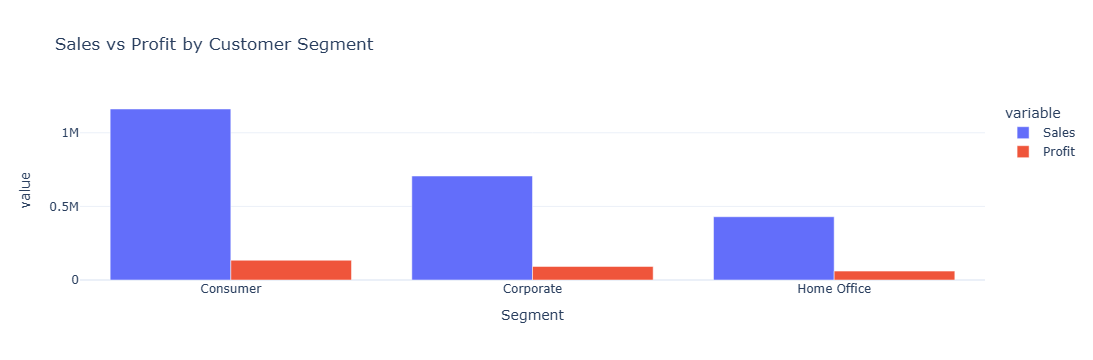

In [29]:
segment_fig=px.bar(
    customer_segment.melt(id_vars='Segment',value_vars=['Sales','Profit']),
    x='Segment',
    y='value',
    color='variable',
    barmode='group',
    title='Sales vs Profit by Customer Segment'
)
segment_fig.show()

Analyze the sales to profit ratio

In [30]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Years,Order Months,Order Days
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,1
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,1
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,6
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,6
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,6


In [31]:
sales_segement_profit=data.groupby('Segment').agg({'Sales':'sum','Profit':'sum'}).reset_index()
sales_segement_profit['Profit Ratio']=sales_segement_profit['Sales']/sales_segement_profit['Profit']
sales_segement_profit


,Segment,Sales,Profit,Profit Ratio
0,Consumer,1.161401e+06,134119.2092,8.659471
1,Corporate,7.061464e+05,91979.1340,7.677245
2,Home Office,4.296531e+05,60298.6785,7.125416


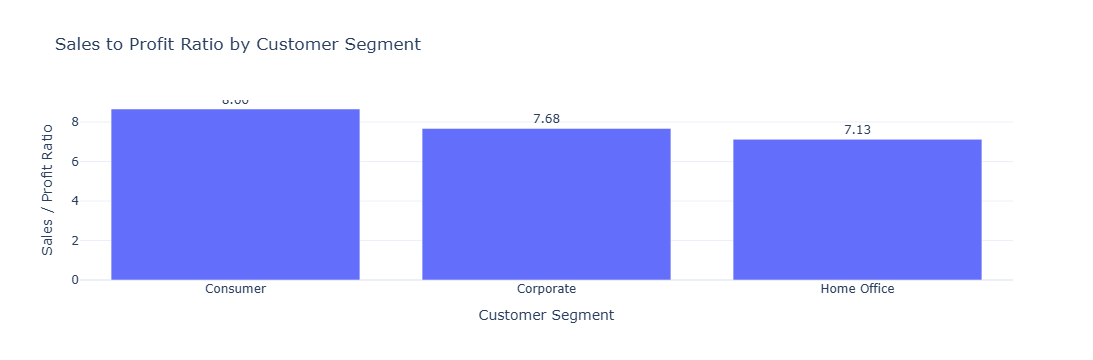

In [32]:
fig = px.bar(
    sales_segement_profit,
    x='Segment',
    y='Profit Ratio',
    title='Sales to Profit Ratio by Customer Segment',
    text='Profit Ratio'
)

fig.update_traces(
    texttemplate='%{text:.2f}',
    textposition='outside'
)

fig.update_layout(
    yaxis_title='Sales / Profit Ratio',
    xaxis_title='Customer Segment'
)

fig.show()